In [1]:
from keras import models, layers
from ngdlm import models as ngldmodels
from ngdlm import utils as ngldutils
from keras.datasets import fashion_mnist
import numpy as np

/Users/tristanbehrens/Development/python-venvs/venv-3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = fashion_mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


# Variational autoencoder.

In [3]:
latent_dim = 2

# Create the encoder.
encoder_input = layers.Input(shape=(28, 28))
encoder_output = layers.Reshape((28 * 28,))(encoder_input)
encoder_output = layers.Dense(512, activation="relu")(encoder_output)

# Create the decoder.
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(512, activation="relu")(decoder_input)
decoder_output = layers.Dense(28 * 28, activation="sigmoid")(decoder_output)
decoder_output = layers.Reshape((28, 28))(decoder_output)

# Create the autoencoder.
vae = ngldmodels.VAE(encoder_input, encoder_output, decoder_input, decoder_output, latent_dim=latent_dim)
vae.compile(optimizer='adadelta', reconstruction_loss="binary_crossentropy")
vae.summary()

# Train.
print("Train...")
history = vae.fit(
        x_input_train, x_input_train,
        epochs=100,
        batch_size=32,
        shuffle=True,
        validation_data=(x_input_test, x_input_test)
    )
    
# Evaluate.
print("Evaluate...")
loss = vae.model.evaluate(x_input_test, x_input_test)
print("Loss:", loss)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      reshape_1[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z_log_var 

60000/60000 [==============================] - 26s 439us/step - loss: 260.6044 - val_loss: 265.3771
Epoch 44/100
60000/60000 [==============================] - 27s 442us/step - loss: 260.5369 - val_loss: 265.0301
Epoch 45/100
60000/60000 [==============================] - 28s 459us/step - loss: 260.5019 - val_loss: 262.5234
Epoch 46/100
60000/60000 [==============================] - 29s 478us/step - loss: 260.4726 - val_loss: 261.9079
Epoch 47/100
60000/60000 [==============================] - 24s 399us/step - loss: 260.3979 - val_loss: 262.4876
Epoch 48/100
60000/60000 [==============================] - 25s 416us/step - loss: 260.3533 - val_loss: 262.3028
Epoch 49/100
60000/60000 [==============================] - 24s 406us/step - loss: 260.3392 - val_loss: 262.4482
Epoch 50/100
60000/60000 [==============================] - 24s 399us/step - loss: 260.2596 - val_loss: 261.8817
Epoch 51/100
60000/60000 [==============================] - 24s 401us/step - loss: 260.2076 - val_loss: 263.5

# Visualizing variational autoencoder.

Rendering history...


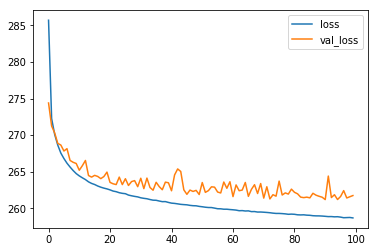

Rendering reconstructions...


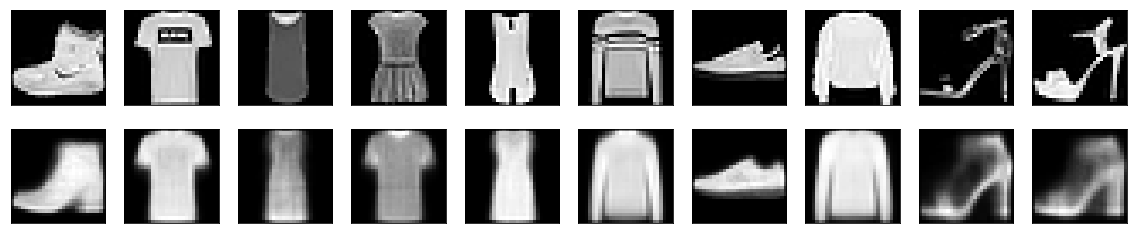

Rendering latent-space...


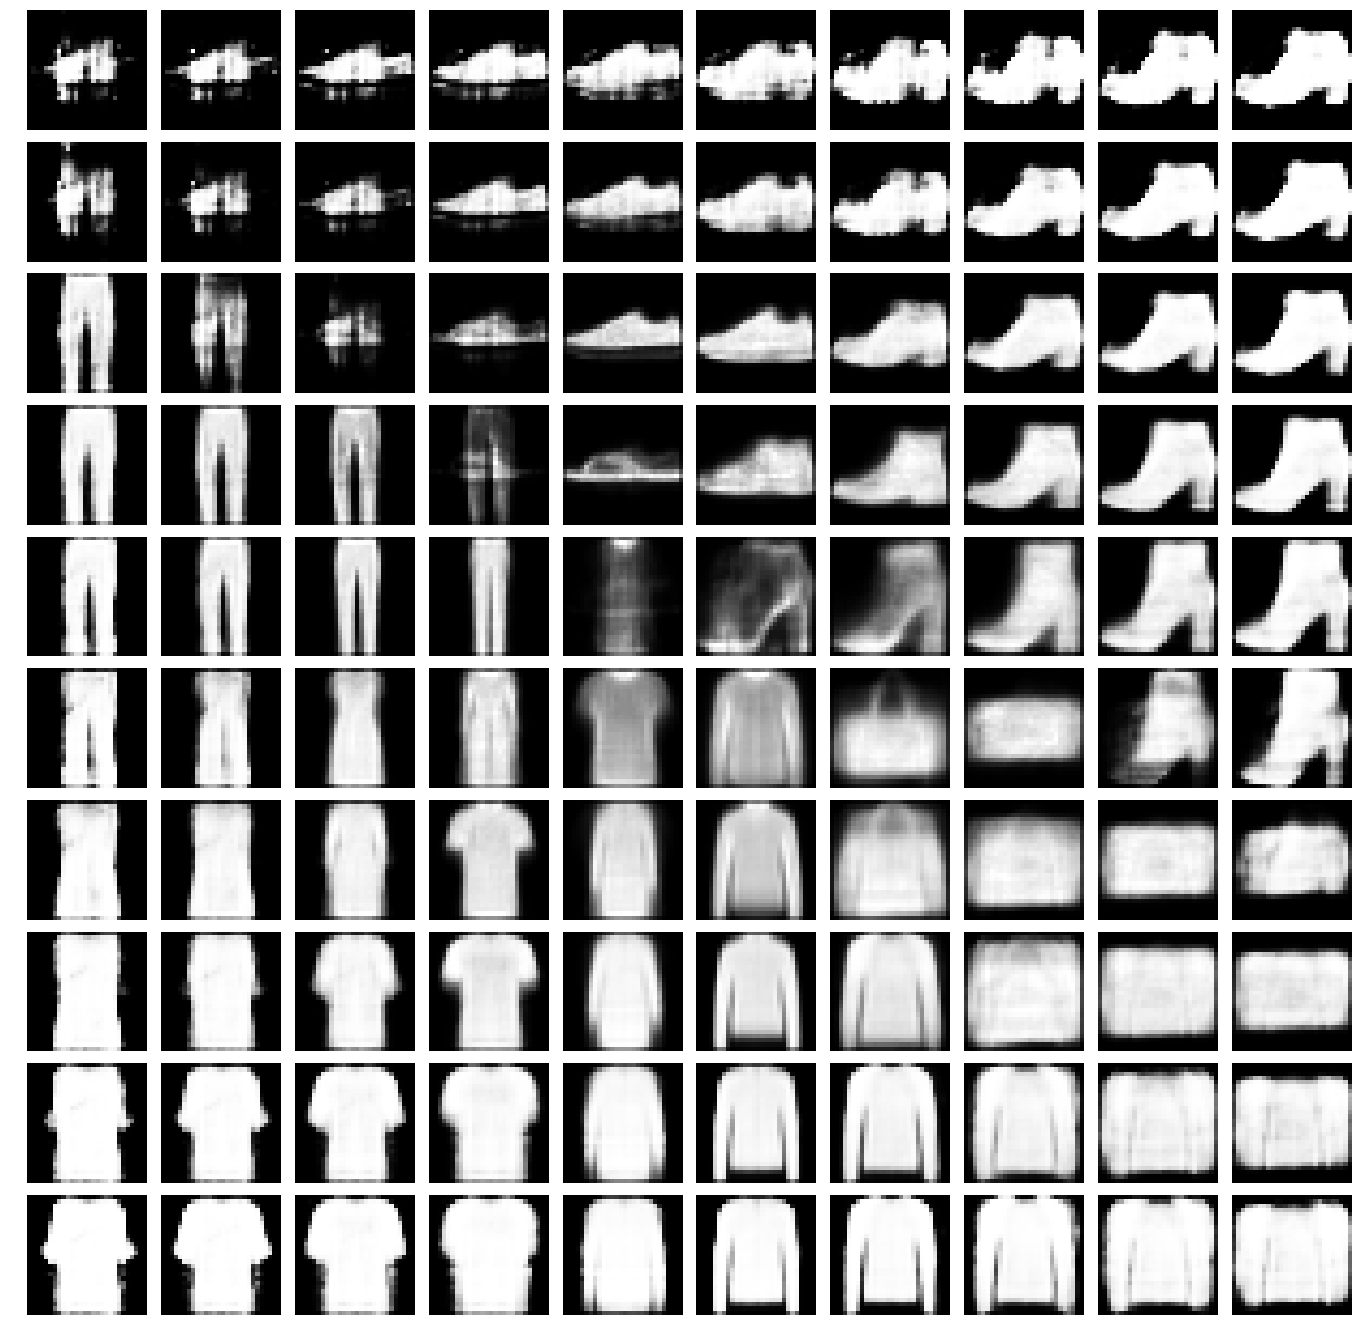

Rendering encodings...


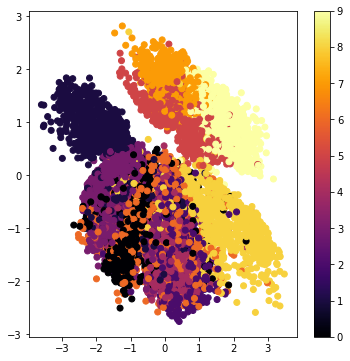

In [4]:
print("Rendering history...")
ngldutils.render_history(history)

print("Rendering reconstructions...")
ngldutils.render_image_reconstructions(vae, x_input_train, 10)

print("Rendering latent-space...")
ngldutils.render_image_latent_space(vae.decoder, 10)

print("Rendering encodings...")
ngldutils.render_encodings(vae.encoder, x_input_test, y_output_test)